In [48]:
from cdsgd import DSClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
import wittgenstein as lw
#pca
from sklearn.decomposition import PCA

In [49]:
Hepta = pd.read_csv('../data/Hepta_Data.csv')
Hepta_labels = pd.read_csv('../data/Hepta_Labels.csv')

Kmeans Silhouette Score: 0.7021314652392165 Number of Clusters: 7
DBSCAN Silhouette Score: 0.7021314652392165 Number of Clusters: 7
Agglomerative Silhouette Score: 0.7021314652392165 Number of Clusters: 7


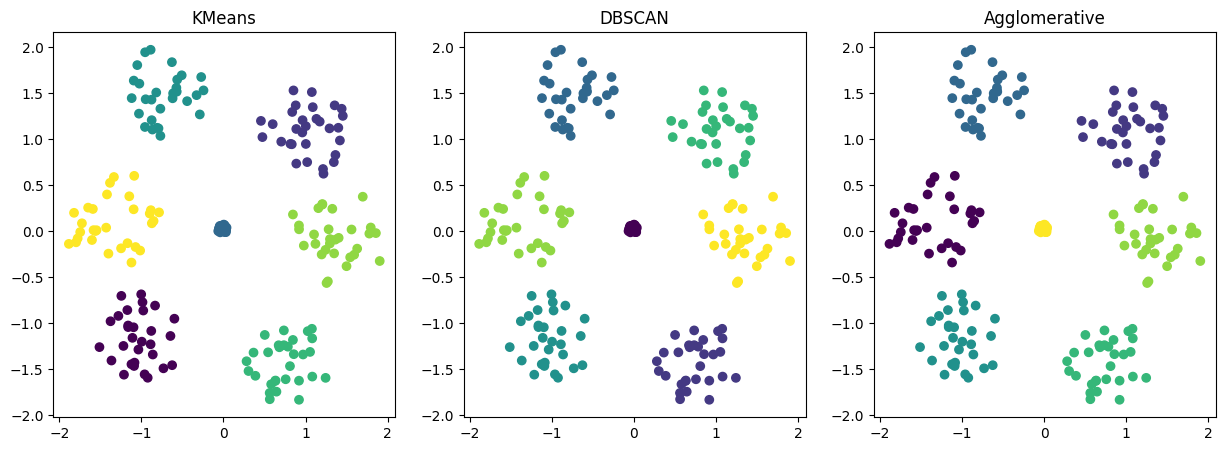

In [50]:
scaler = StandardScaler()
Hepta_scaled = scaler.fit_transform(Hepta)
Hepta = pd.DataFrame(Hepta_scaled, columns=Hepta.columns)
models = []
kmeans = KMeans(n_clusters=7)
kmeans_labels = kmeans.fit_predict(Hepta)
models.append({'model': kmeans, 'name': 'KMeans', 'labels': kmeans_labels})
print('Kmeans Silhouette Score:', silhouette_score(Hepta, kmeans_labels), "Number of Clusters:", len(np.unique(kmeans_labels)))

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(Hepta)
models.append({'model': dbscan, 'name': 'DBSCAN', 'labels': dbscan_labels})
if len(np.unique(dbscan_labels)) > 1:
    print('DBSCAN Silhouette Score:', silhouette_score(Hepta, dbscan_labels), "Number of Clusters:", len(np.unique(dbscan_labels)))
else:
    print('DBSCAN Silhouette Score: N/A', "Number of Clusters:", len(np.unique(dbscan_labels)))

agg = AgglomerativeClustering(n_clusters=7)
agg_labels = agg.fit_predict(Hepta)
models.append({'model': agg, 'name': 'Agglomerative', 'labels': agg_labels})
print('Agglomerative Silhouette Score:', silhouette_score(Hepta, agg_labels), "Number of Clusters:", len(np.unique(agg_labels)))

# visualize the clusters
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Hepta)
    ax[i].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i].set_title(model['name'])
plt.show()

## Lime

In [51]:
clustterToExplain = 1
i = 100 # instance to explain

#KMeans
y = (kmeans_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Hepta, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Hepta, y)
print('KMeans Accuracy:', accuracy_score(y, clf.predict(Hepta)))
explainer = LimeTabularExplainer(Hepta.values, mode='classification', feature_names=Hepta.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Hepta.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

#DBSCAN
if len(np.unique(dbscan_labels)) > 1:
    y = (dbscan_labels == clustterToExplain).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(Hepta, y, test_size=0.2, random_state=42)
    clf = LogisticRegression()
    clf.fit(Hepta, y)
    print('DBSCAN Accuracy:', accuracy_score(y, clf.predict(Hepta)))
    explainer = LimeTabularExplainer(Hepta.values, mode='classification', feature_names=Hepta.columns, class_names=['0', '1'], discretize_continuous=True)
    exp = explainer.explain_instance(Hepta.values[i], clf.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True, show_all=False)

#Agglomerative
y = (agg_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Hepta, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Hepta, y)
print('Agglomerative Accuracy:', accuracy_score(y, clf.predict(Hepta)))
explainer = LimeTabularExplainer(Hepta.values, mode='classification', feature_names=Hepta.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Hepta.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

KMeans Accuracy: 1.0


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


DBSCAN Accuracy: 1.0


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Agglomerative Accuracy: 1.0


c:\Users\Daniel\Documents\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision tree

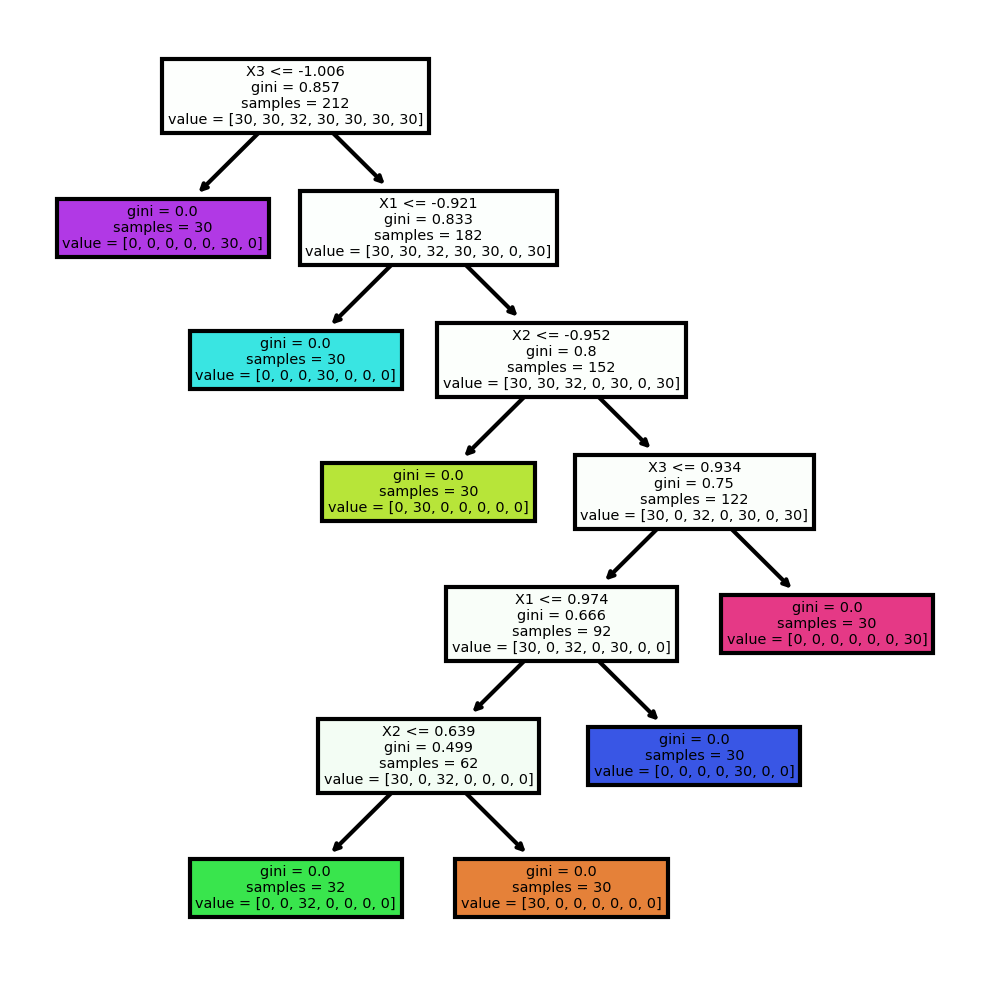

Decision Tree Accuracy: 1.0


In [52]:
# interpretamos con decision tree
dt = DecisionTreeClassifier()
dt.fit(Hepta, kmeans_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Hepta.columns)
plt.show()
y_pred = dt.predict(Hepta)
print('Decision Tree Accuracy:', accuracy_score(kmeans_labels, y_pred))


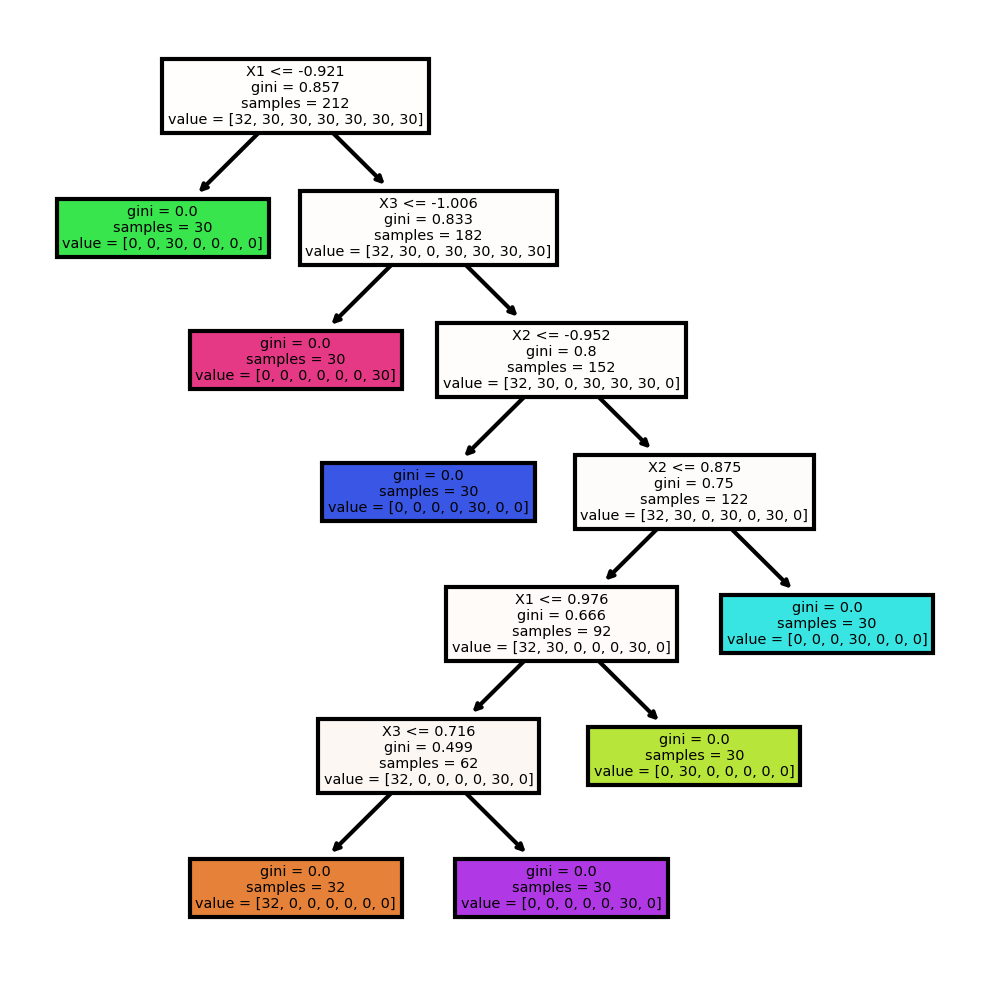

Decision Tree Accuracy: 1.0


In [53]:
# interpretamos con decision tree
dt = DecisionTreeClassifier()
dt.fit(Hepta, dbscan_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Hepta.columns)
plt.show()
y_pred = dt.predict(Hepta)
print('Decision Tree Accuracy:', accuracy_score(dbscan_labels, y_pred))

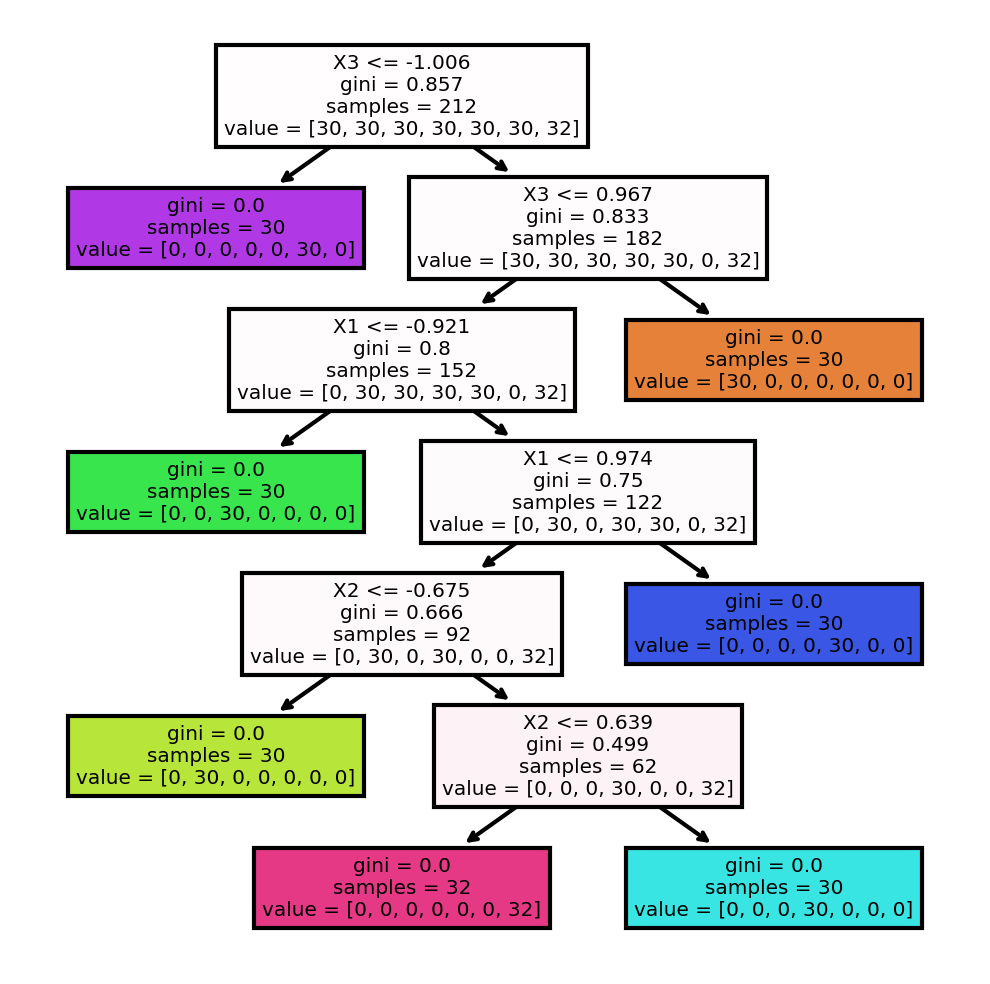

Decision Tree Accuracy: 1.0


In [54]:
# interpretamos con decision tree
dt = DecisionTreeClassifier()
dt.fit(Hepta, agg_labels)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Hepta.columns)
plt.show()
y_pred = dt.predict(Hepta)
print('Decision Tree Accuracy:', accuracy_score(agg_labels, y_pred))

# RIPPER

In [64]:
pos = 5
# cambiamos las etiquetas para que el positivo sea el cluster 0
kmeans_labels_pos = (kmeans_labels == pos).astype(int)
dbscan_labels_pos = (dbscan_labels == pos).astype(int)
agg_labels_pos = (agg_labels == pos).astype(int)
# KMeans
""" ripper = lw.RIPPER()
df = pd.concat([Hepta, pd.DataFrame(kmeans_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Hepta)
print('RIPPER Accuracy KMeans:', accuracy_score(kmeans_labels_pos, y_pred)) """
# DBSCAN
""" ripper = lw.RIPPER()
df = pd.concat([Hepta, pd.DataFrame(dbscan_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Hepta)
print('RIPPER Accuracy DBSCAN:', accuracy_score(dbscan_labels_pos, y_pred)) """
# Agglomerative
ripper = lw.RIPPER()
df = pd.concat([Hepta, pd.DataFrame(agg_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Hepta)
print('RIPPER Accuracy Agglomerative:', accuracy_score(agg_labels_pos, y_pred))

[[X3=<-1.73] V [X3=-1.73--0.39^X1=-0.34--0.17] V [X3=-1.73--0.39^X1=-1.64--0.34]]
RIPPER Accuracy Agglomerative: 0.9811320754716981


## DSClustering

In [56]:
cdsgd = DSClustering(data=Hepta,cluster=7)
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD con 7 clusters', 'labels': cdsgd_labels})

Optimization started
Processing epoch	125	0.0004	
Training time: 3.46s, epochs: 126

Least training loss reached: 0.000


In [57]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.590] R10: -0.036 < X3 < 0.624
			0: 0.348	1: 0.000	2: 0.303	3: 0.000	4: 0.228	5: 0.087	6: 0.034	Unc: 0.000

	[0.509] R9: -0.695 < X3 < -0.036
			0: 0.260	1: 0.000	2: 0.000	3: 0.000	4: 0.240	5: 0.282	6: 0.218	Unc: 0.000

	[0.499] R6: -0.014 < X2 < 0.637
			0: 0.255	1: 0.244	2: 0.118	3: 0.194	4: 0.168	5: 0.000	6: 0.000	Unc: 0.021

	[0.444] R0: X1 < -0.648
			0: 0.444	1: 0.000	2: 0.000	3: 0.000	4: 0.000	5: 0.000	6: 0.000	Unc: 0.556

	[0.444] R5: -0.666 < X2 < -0.014
			0: 0.213	1: 0.285	2: 0.053	3: 0.194	4: 0.182	5: 0.000	6: 0.000	Unc: 0.074

	[0.364] R27: Negative X1 - 0.075, X3 - -0.036
			0: 0.185	1: 0.023	2: 0.198	3: 0.007	4: 0.254	5: 0.036	6: 0.011	Unc: 0.285

	[0.335] R35: Negative X2 - -0.014, X3 - -0.036
			0: 0.201	1: 0.010	2: 0.000	3: 0.078	4: 0.247	5: 0.023	6: 0.000	Unc: 0.441

	[0.286] R24: Positive X1 - 0.075, X2 - -0.014
			0: 0.148	1: 0.040	2: 0.000	3: 0.025	4: 0.103	5: 0.080	6: 0.155	Unc: 0.448

Most important rules for Cluster 1



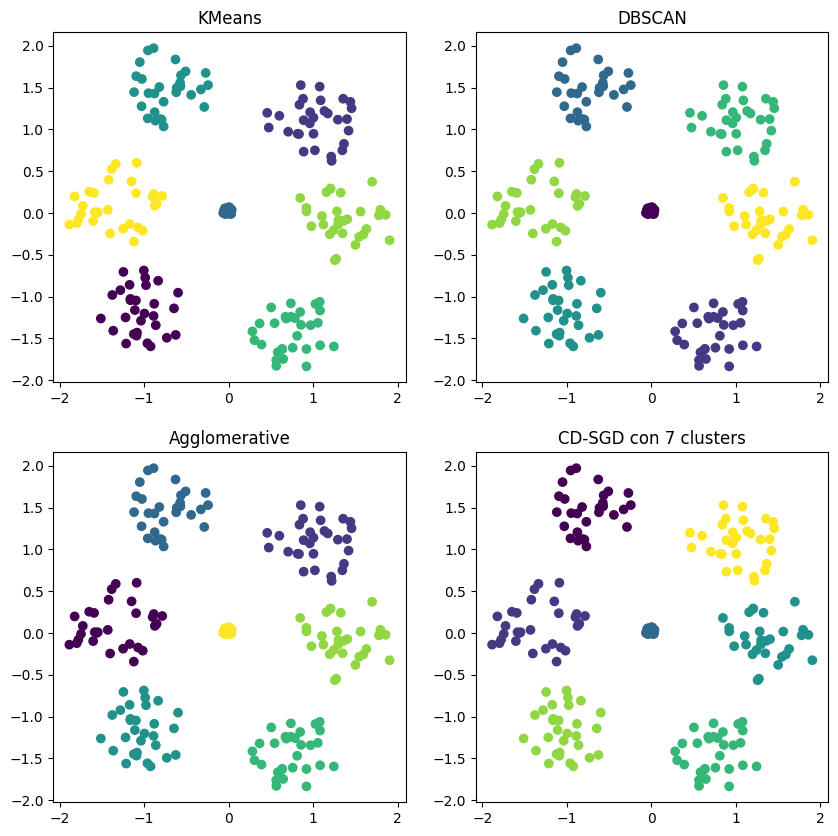

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Hepta)
    ax[i//2, i%2].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i//2, i%2].title.set_text(model['name'])
plt.show()